# **Project Goal**
The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( buy or no buy ), based on the values of the given features.

We will try a number of different classification algorithms, and compare their performance, in order to pick the best one for the project.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import io
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from google.colab import files

# **Data Import**

```
# This is formatted as code
```



In [ ]:
data = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention (2).csv


# **Data Header**

In [ ]:
df = pd.read_csv(io.StringIO(data['online_shoppers_intention.csv'].decode('utf-8')))

In [ ]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# **Data Cleaning**

In [ ]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# EDA
**Correlation Analysis**

<ipython-input-150-87aa1235496c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
<ipython-input-150-87aa1235496c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')


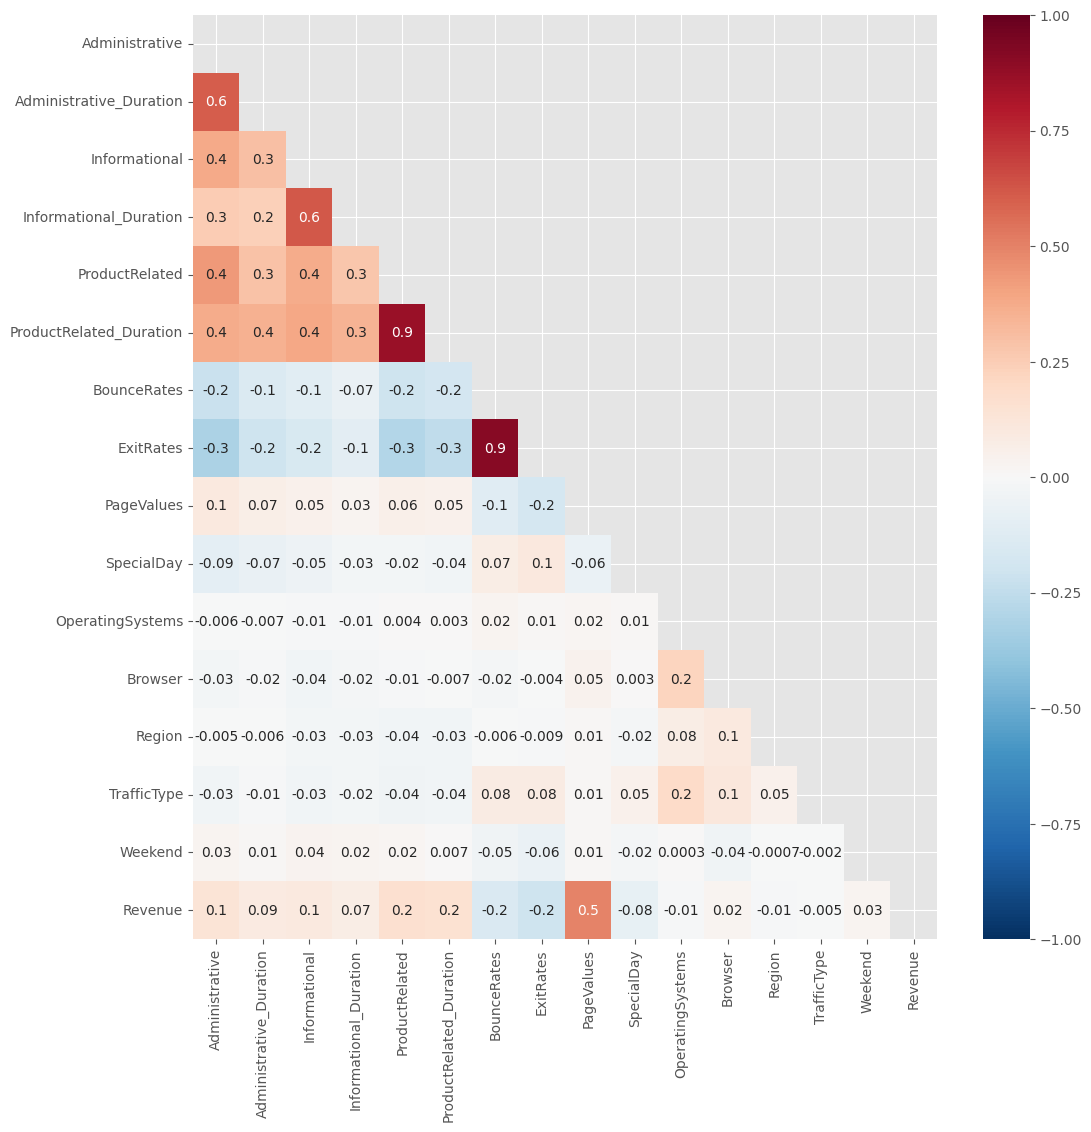

In [ ]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the above heatmap, we observe the following:

In general, there is very little correlation among the different features in our dataset.
The very few cases of high correlation (|corr| >= 0.7) are:
BounceRates & ExitRates (0.9).
ProductRelated & ProductRelated_Duration (0.9).
Moderate Correlations (0.3 < |corr| < 0.7):
Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.
Also between PageValues and Revenue.
let's now show correlation among a few of our features

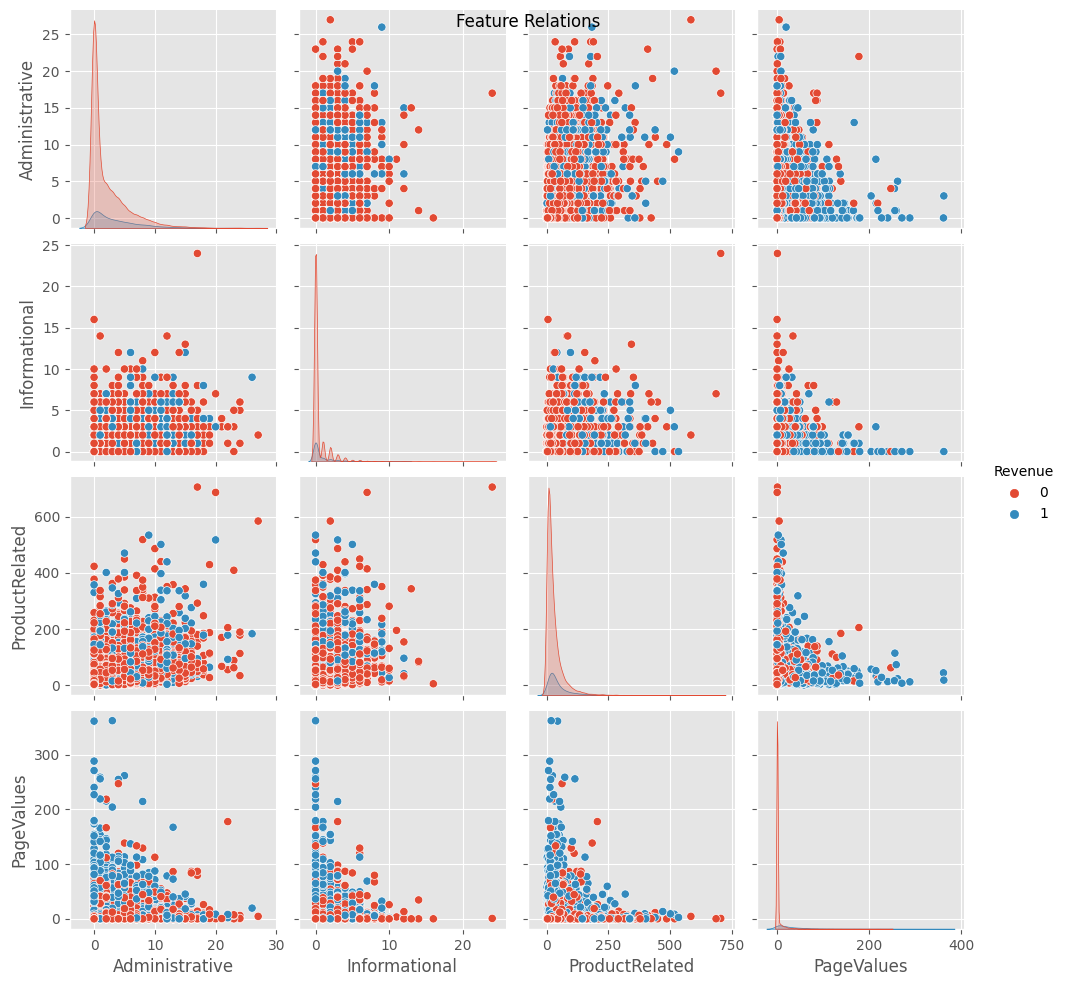

In [ ]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

From the above figure, we can see:

No strong correlation between Revenue (our target) and any other feature.
### A strong negative correlation between PageValues and other features shown.

# Web Pages Analysis

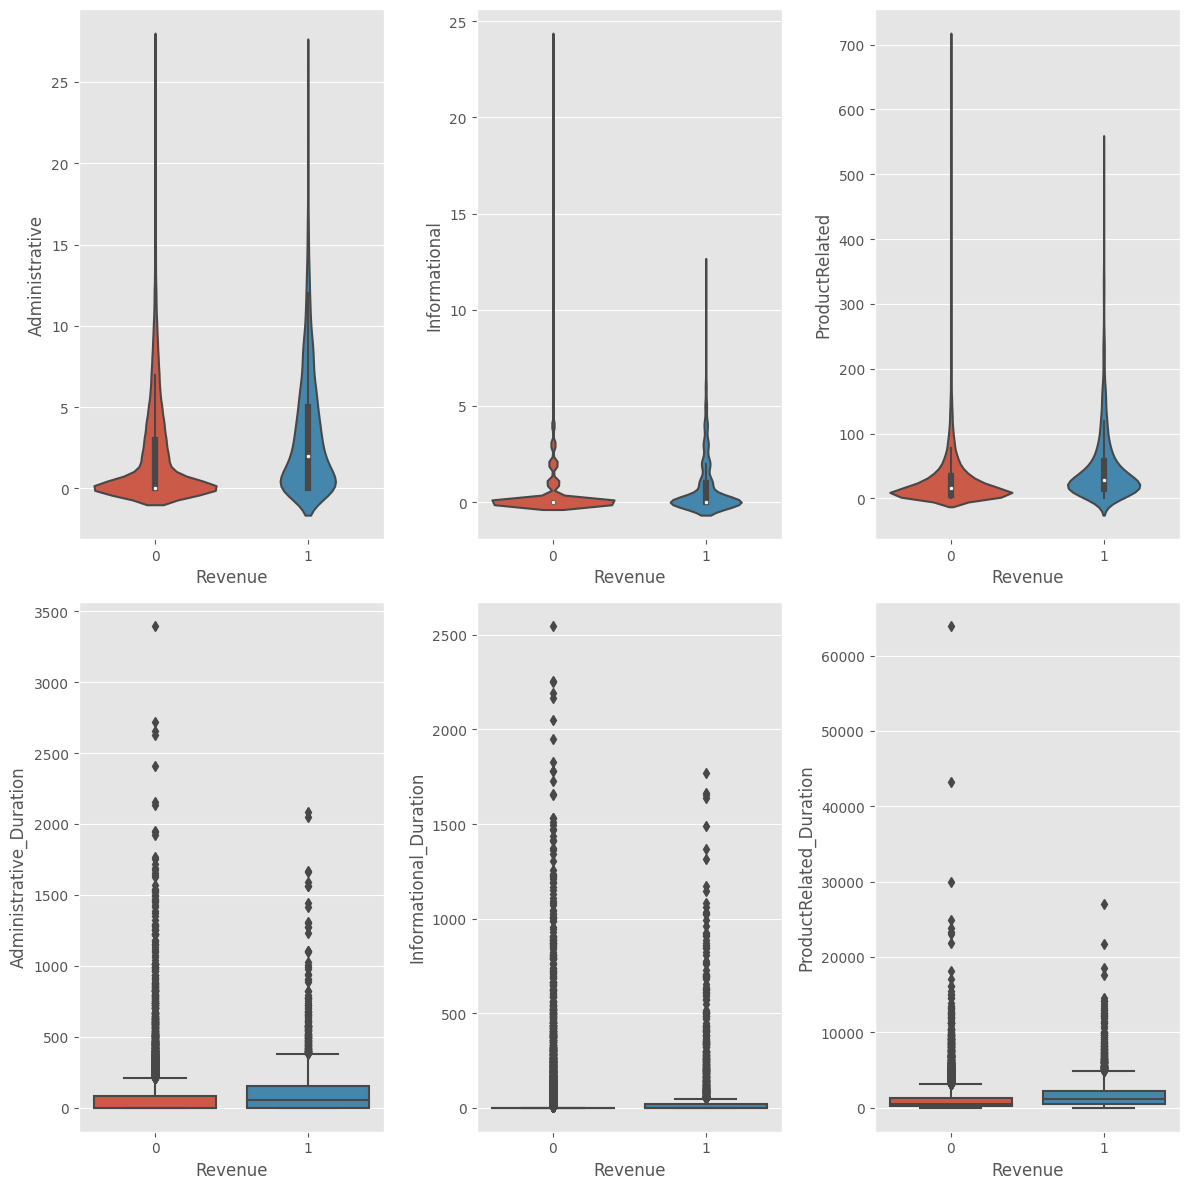

In [ ]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

rom the above boxplots, we can see that:

In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.
The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
The first 3 feature look like they follow a skewed normal distribution.

# Page Metrics Analysis

<ipython-input-153-73ab786d5f7d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BounceRates'], bins=20, ax=ax1)
<ipython-input-153-73ab786d5f7d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ExitRates'], bins=20, ax=ax2)
<ipython-input-153-73ab786d5f7d>:9: UserWarning: 

`distplot` 

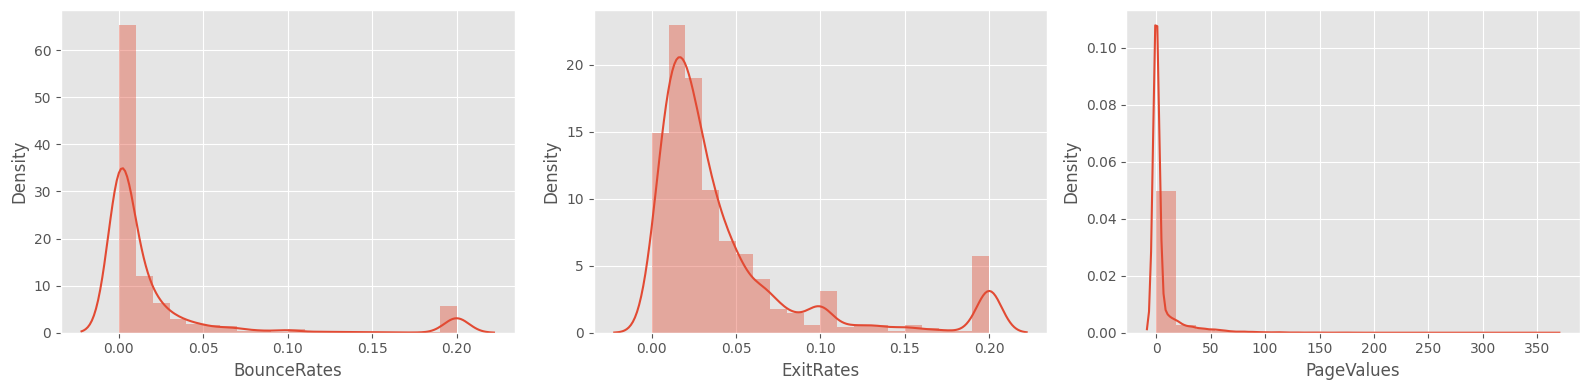

In [ ]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1)
sns.distplot(df['ExitRates'], bins=20, ax=ax2)
sns.distplot(df['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations of 3 google analytics metrics, we can conclude:

BounceRates & PageValues do not follow a normal distribution.
All 3 features have distributions that are skewed right.
All 3 distributions have a lot of outliers.
The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website.
Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase.
Bounce rate ==> the percentage where the first page visited was the only page visited in that session.
Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page.

# Visitor Analysis

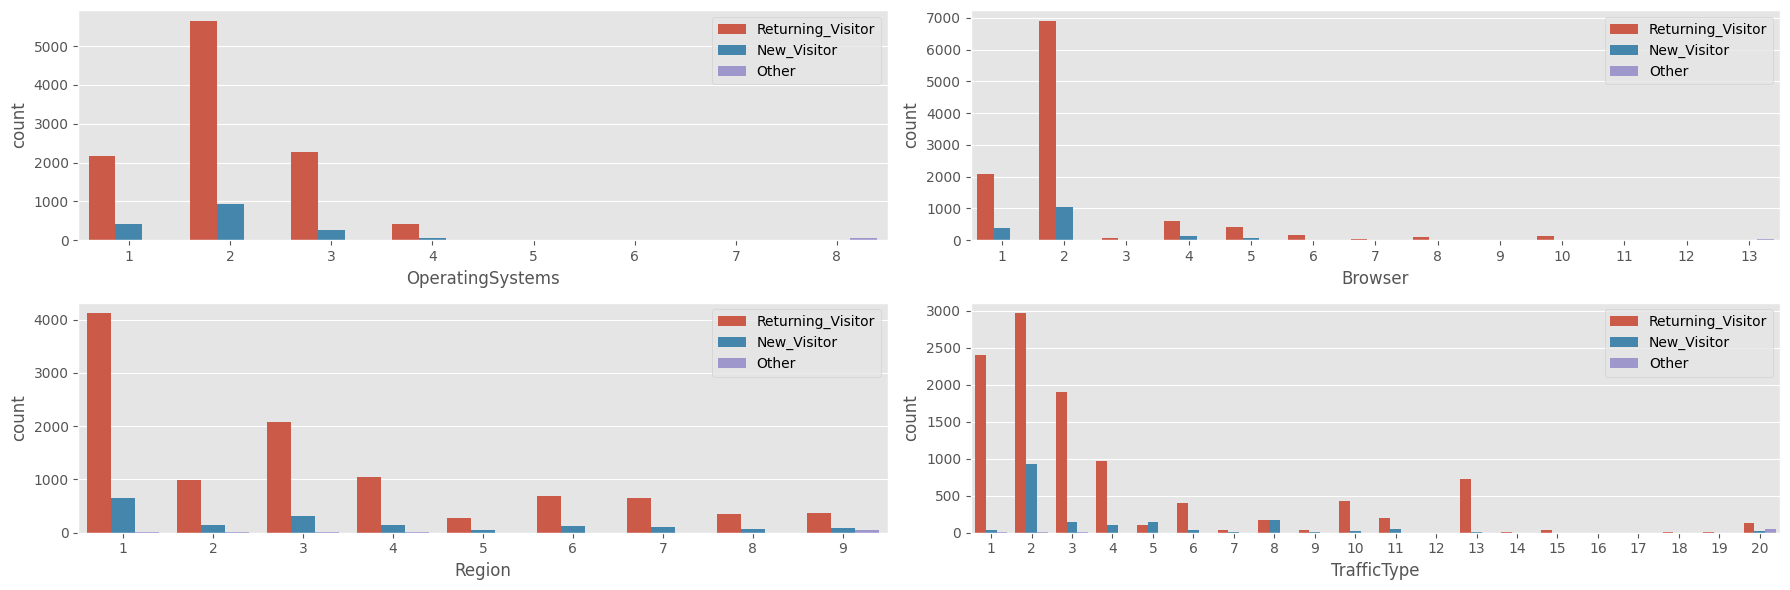

In [ ]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

1 Operating system is responsible for ~7000 of the examples in our dataset.
4 of the 8 operating systems used, are responsible of a very small number (<200) of the examples in our dataset.
A similar story repeated with the browsers used by visitors, where there is 1 dominant browser, 3 with decent representation in the dataset, and the rest are rarey used.
It looks like we have a very regionally diverse traffic in our dataset.
Also Traffic sources are very diverse, with a few that did not contribute much to the dataset.

# Visit Date Analysis

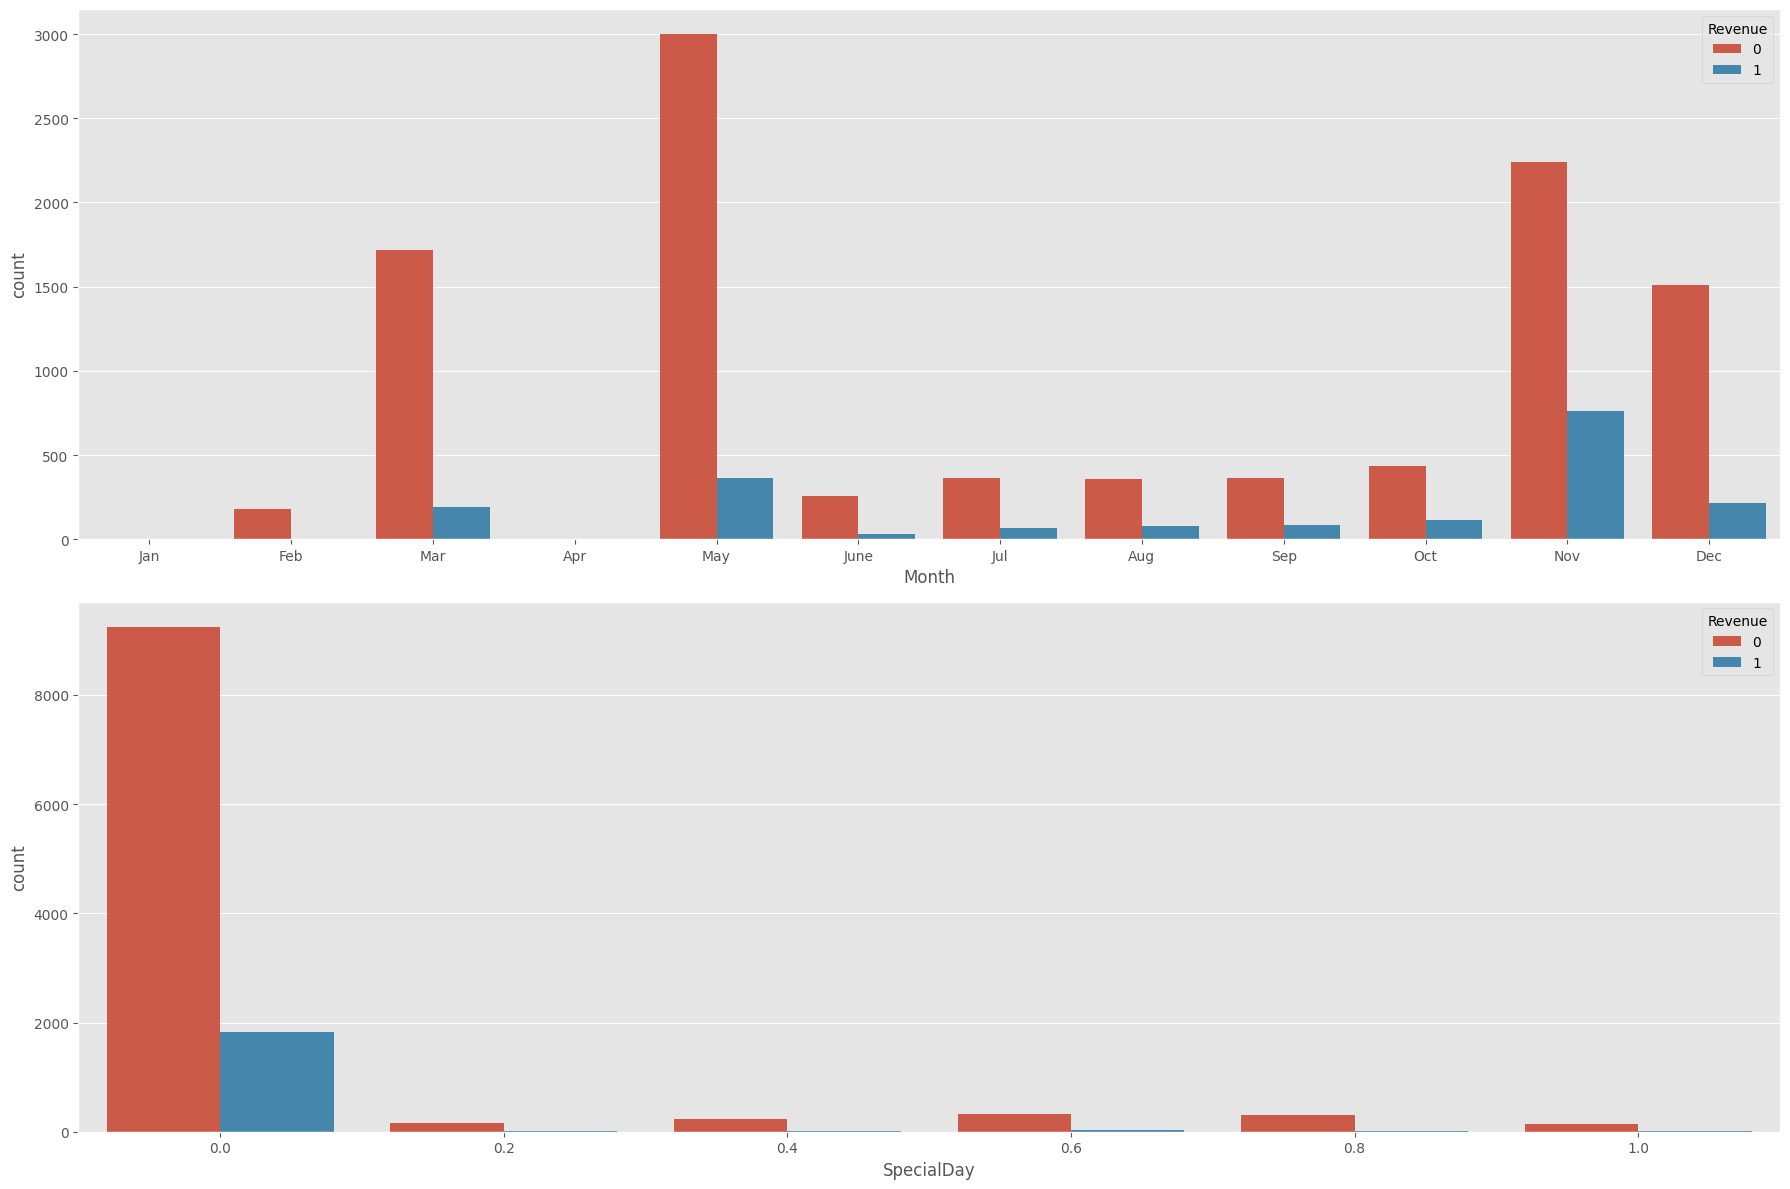

In [ ]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

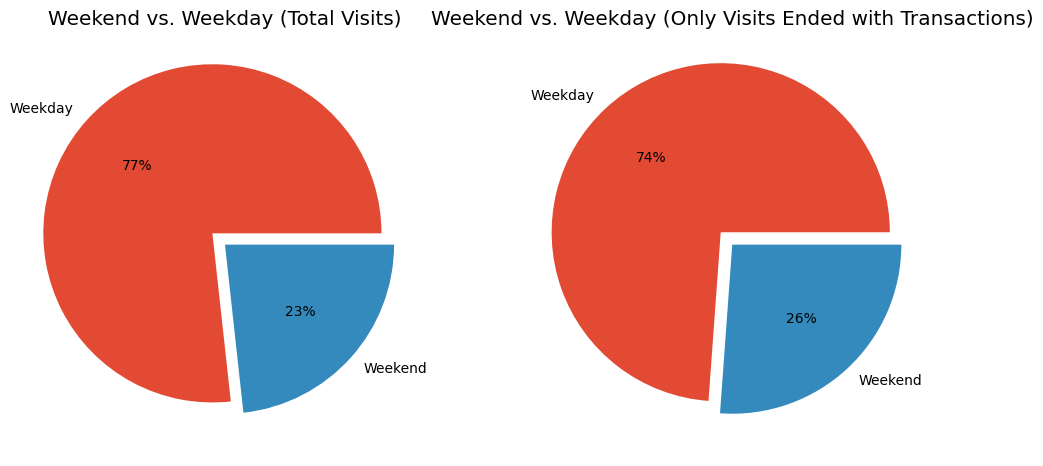

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level.
We have no visits at all during Jan nor Apr.
Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions.
The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction.
Most of transactions happen on special days (SpecialDay =0).
It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays.

# **Data Pre-Processing**

In this section we will make our data ready for model training. This will include:

Transform Month and VisitorType columns into numerical (binary) values.
Split data set into training, validation, and testing parts (70/15/15), while separating Revenue column, where it will be used as our labels.
We will ably feature scaling on our input data, in order to be used for Naive Bayes and SVM model training.

**Data Transformation**

In [ ]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
dff.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,0,0,0,0,0,0,0,1
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,0,0,0,1
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,0,0,0,0,0,0,0,0,0,1


# Data Split

In [ ]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [ ]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

Now we have the following data subsets:

Train data (X_train) and trin labels (y_train) ==> 70%
Validation data (X_val) and validation labels (y_val) ==> 15%
Test data (X_test) and test labels (y)test) ==> 15%

# Data Scaling

In [ ]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

# **Model Building**

**Naive Bayes**

We will go with a Gaussian Naive Bayes classifier, since some of our features are normally distributed, even though other features don't follow a normal distribution.

In [ ]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.775013520822066
F1 Score        :  0.4914425427872861
Precision       :  0.3941176470588235
Recall          :  0.6525974025974026
Confusion Matrix:
  [[1232  309]
 [ 107  201]]


KNN
For K-Nearest Neighbor classifier, we will be using the scaled version of our dataset.

KNN is a non-parametric (no assumption for underlying data distribution) learning algorithm, the model structure determined from the dataset. This will be very helpful in dataset where many features do not follow a specific theoretical assumption.

# **KNN**

For K-Nearest Neighbor classifier, we will be using the scaled version of our dataset.

KNN is a non-parametric (no assumption for underlying data distribution) learning algorithm, the model structure determined from the dataset. This will be very helpful in dataset where many features do not follow a specific theoretical assumption.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5021276595744681
Precision       :  0.7283950617283951
Recall          :  0.38311688311688313
Confusion Matrix:
  [[1497   44]
 [ 190  118]]


Compared to Naive Bayes, KNN's initial model causes a considerable increase in accuracy and F1 score, with a decrease in recall. Now we will try increase its performance even more with hyper-parameter tuning via grid search.

KNN Tuning
The following KNN parameters will be tuned:

leaf_size: Leaf size can affect the speed and the memory required to store the tree.
n_neighbors: Number of neighbors to use
p: determines the distance metric to be used: p=1 ==> manhattan_distance, and p=2 ==> euclidean_distance
weights: weight function used in prediction

# **KNN Tuning**


The following KNN parameters will be tuned:

leaf_size: Leaf size can affect the speed and the memory required to store the tree.
n_neighbors: Number of neighbors to use
p: determines the distance metric to be used: p=1 ==> manhattan_distance, and p=2 ==> euclidean_distance
weights: weight function used in prediction

In [ ]:
knn_param_grid = {'n_neighbors': list(range(1,30)),
                  'leaf_size': [1,10,20,30,40,50],
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [ ]:
knn_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 696 candidates, totalling 3480 fits
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.828 total time=   0.4s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.845 total time=   0.4s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.4s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.5s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.848 total time=   0.9s
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.828 total time=   0.8s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.845 total time=   0.4s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.4s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.3s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.848 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1, weights='distance')

In [ ]:
knn_grid_pred = knn_grid.predict(Xsc_val)

In [ ]:
print('K-Nearest Neighbor Tuned Performance:')
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_grid_pred))

K-Nearest Neighbor Tuned Performance:
-------------------------------------
Accuracy        :  0.8674959437533802
F1 Score        :  0.44191343963553537
Precision       :  0.7404580152671756
Recall          :  0.31493506493506496
Confusion Matrix:
  [[1507   34]
 [ 211   97]]


# **Logistic Regression**

Logistic regression measures the relationship between the categorical dependent variable and the independent variables by estimating probabilities using a logistic/sigmoid function.

In [ ]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8788534342888048
F1 Score        :  0.5313807531380752
Precision       :  0.7470588235294118
Recall          :  0.41233766233766234
Confusion Matrix:
  [[1498   43]
 [ 181  127]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Logistic Regression Tuning**

In [ ]:
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3)

In [ ]:
lrm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.877 total time=   0.6s
[CV 2/5] END ..........C=0.01, solver=newton-cg;, score=0.882 total time=   0.5s
[CV 3/5] END ..........C=0.01, solver=newton-cg;, score=0.884 total time=   0.5s
[CV 4/5] END ..........C=0.01, solver=newton-cg;, score=0.881 total time=   0.6s
[CV 5/5] END ..........C=0.01, solver=newton-cg;, score=0.877 total time=   0.5s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.879 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.884 total time=   0.1s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.883 total time=   0.1s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.879 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.878 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.01, solver=sag;, score=0.854 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.01, solver=sag;, score=0.853 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.01, solver=sag;, score=0.870 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...............C=0.01, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...............C=0.01, solver=saga;, score=0.842 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...............C=0.01, solver=saga;, score=0.846 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...............C=0.01, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...............C=0.01, solver=saga;, score=0.857 total time=   0.3s
[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.879 total time=   0.4s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.882 total time=   0.3s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.883 total time=   0.3s
[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.880 total time=   0.3s
[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.882 total time=   0.3s
[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.874 total time=   0.1s
[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.882 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.884 total time=   0.1s
[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.883 total time=   0.1s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.877 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END .................C=0.1, solver=sag;, score=0.854 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=0.1, solver=sag;, score=0.853 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=0.1, solver=sag;, score=0.870 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.1, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.1, solver=saga;, score=0.842 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.1, solver=saga;, score=0.846 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.1, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.1, solver=saga;, score=0.857 total time=   0.3s
[CV 1/5] END .............C=1, solver=newton-cg;, score=0.881 total time=   0.5s
[CV 2/5] END .............C=1, solver=newton-cg;, score=0.884 total time=   0.4s
[CV 3/5] END .............C=1, solver=newton-cg;, score=0.885 total time=   0.5s
[CV 4/5] END .............C=1, solver=newton-cg;, score=0.881 total time=   0.4s
[CV 5/5] END .............C=1, solver=newton-cg;, score=0.882 total time=   0.5s
[CV 1/5] END .................C=1, solver=lbfgs;, score=0.878 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5] END .................C=1, solver=lbfgs;, score=0.885 total time=   0.1s
[CV 3/5] END .................C=1, solver=lbfgs;, score=0.883 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5] END .................C=1, solver=lbfgs;, score=0.879 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .................C=1, solver=lbfgs;, score=0.877 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...................C=1, solver=sag;, score=0.854 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...................C=1, solver=sag;, score=0.853 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...................C=1, solver=sag;, score=0.870 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=1, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=1, solver=saga;, score=0.842 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=1, solver=saga;, score=0.846 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=1, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=1, solver=saga;, score=0.857 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END ............C=10, solver=newton-cg;, score=0.881 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END ............C=10, solver=newton-cg;, score=0.885 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END ............C=10, solver=newton-cg;, score=0.886 total time=   0.6s
[CV 4/5] END ............C=10, solver=newton-cg;, score=0.882 total time=   0.6s
[CV 5/5] END ............C=10, solver=newton-cg;, score=0.884 total time=   0.7s
[CV 1/5] END ................C=10, solver=lbfgs;, score=0.882 total time=   0.1s
[CV 2/5] END ................C=10, solver=lbfgs;, score=0.882 total time=   0.1s
[CV 3/5] END ................C=10, solver=lbfgs;, score=0.884 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5] END ................C=10, solver=lbfgs;, score=0.879 total time=   0.1s
[CV 5/5] END ................C=10, solver=lbfgs;, score=0.877 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=10, solver=sag;, score=0.854 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=10, solver=sag;, score=0.853 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=10, solver=sag;, score=0.870 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=10, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=10, solver=saga;, score=0.842 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=10, solver=saga;, score=0.846 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=10, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=10, solver=saga;, score=0.857 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...........C=100, solver=newton-cg;, score=0.882 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........C=100, solver=newton-cg;, score=0.885 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   1.1s
[CV 1/5] END ...............C=100, solver=lbfgs;, score=0.877 total time=   0.1s
[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.884 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END ...............C=100, solver=lbfgs;, score=0.885 total time=   0.1s
[CV 4/5] END ...............C=100, solver=lbfgs;, score=0.879 total time=   0.1s
[CV 5/5] END ...............C=100, solver=lbfgs;, score=0.877 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END .................C=100, solver=sag;, score=0.854 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=100, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=100, solver=sag;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=100, solver=sag;, score=0.853 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=100, solver=sag;, score=0.870 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=100, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=100, solver=saga;, score=0.842 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=100, solver=saga;, score=0.846 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=100, solver=saga;, score=0.848 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=100, solver=saga;, score=0.857 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=3)

In [ ]:
lrm_grid.best_params_

{'C': 100, 'solver': 'newton-cg'}

In [ ]:
lrm_grid.best_estimator_

LogisticRegression(C=100, solver='newton-cg')

In [ ]:
lrm_grid = LogisticRegression(C=10,solver='newton-cg',) #default parameters
lrm_grid.fit(X_train,y_train)
lrm_grid_pred = lrm_grid.predict(X_val)

print('Logistic Regression Tuned Performance:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_grid_pred))

Logistic Regression Tuned Performance:
--------------------------------------
Accuracy        :  0.879394267171444
F1 Score        :  0.5285412262156448
Precision       :  0.7575757575757576
Recall          :  0.40584415584415584
Confusion Matrix:
  [[1501   40]
 [ 183  125]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


# **Gradient Boost**

In [ ]:
gbm = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

print('Gradient Boost initial Performance:')
print('-----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boost initial Performance:
-----------------------------------
Accuracy        :  0.9053542455381287
F1 Score        :  0.6891651865008881
Precision       :  0.7607843137254902
Recall          :  0.6298701298701299
Confusion Matrix:
  [[1480   61]
 [ 114  194]]


# **Gradient Boost Tuning**

In [ ]:
gbm_param_grid = {'n_estimators': [10,80,200,800,2000,5000],
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15],
                  'loss': ['deviance', 'exponential'],
                  'learning_rate':[0.01,0.1,0.5],
                  'subsample':[0.7, 0.8,0.9, 1]}

gbm_grid = RandomizedSearchCV(GradientBoostingClassifier(),
                        gbm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [ ]:
gbm_grid = GradientBoostingClassifier(loss='exponential',
    learning_rate=0.1,
    n_estimators=5000,
    subsample=0.7,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=40,
    max_features='log2') #tuned parameters
gbm_grid.fit(X_train,y_train)
gbm_grid_pred = gbm_grid.predict(X_val)

print('Gradient Boost Tuned Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_grid_pred))

Gradient Boost Tuned Performance:
---------------------------------
Accuracy        :  0.8972417522985398
F1 Score        :  0.6415094339622641
Precision       :  0.7657657657657657
Recall          :  0.551948051948052
Confusion Matrix:
  [[1489   52]
 [ 138  170]]


# **Model Building Validation-Results**

Here are the classification performance measures for the 4 different classification modelss tested:

Naive Bayes

KNN

Logistic Regression

Gradient Boost



# ROC Curves

ROC curve is a model selection metric for bi–multi class classification problems. It is a probability curve for different classes and it tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate on the X-axis and True Positive Rate on the Y-axis. The bigger the area covered by the curve, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

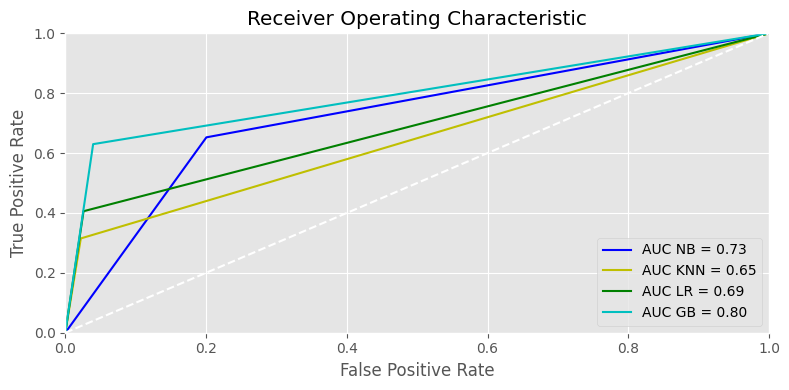

In [ ]:
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_val, nbm_pred)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_grid_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
#fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_val, svm_grid_pred)
#roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_grid_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
#fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_grid_pred)
#roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_val, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
#fpr_abm, tpr_abm, threshold_abm = metrics.roc_curve(y_val, abm_grid_pred)
#roc_auc_abm = metrics.auc(fpr_abm, tpr_abm)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
#plt.plot(fpr_svm, tpr_svm, 'r', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
#plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC GB = %0.2f' % roc_auc_gbm)
#plt.plot(fpr_abm, tpr_abm, 'm', label = 'AUC AB = %0.2f' % roc_auc_abm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

It is clear from all the calculated classification metrics shown above that Navie Bayes classifier is the one with the highest performance, and thus, it is the one we will continue to choose.

# **Best Model Further Tuning**


Here we will experment manually tuning some of Gradient Boosting's hyper-parameters, to see if we can improve its classification performance further more.

Not all the tests are going to be shown below, we will only show the ones that improved GB's classification performance, yet here is a list of the tests we have tried, by changing only one parameter value at a time:

In [ ]:
gbm2 = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

print('Gradient Boost Performance test :')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm2_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm2_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm2_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm2_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boost Performance test :
---------------------------------
Accuracy        :  0.9069767441860465
F1 Score        :  0.6950354609929078
Precision       :  0.765625
Recall          :  0.6363636363636364
Confusion Matrix:
  [[1481   60]
 [ 112  196]]


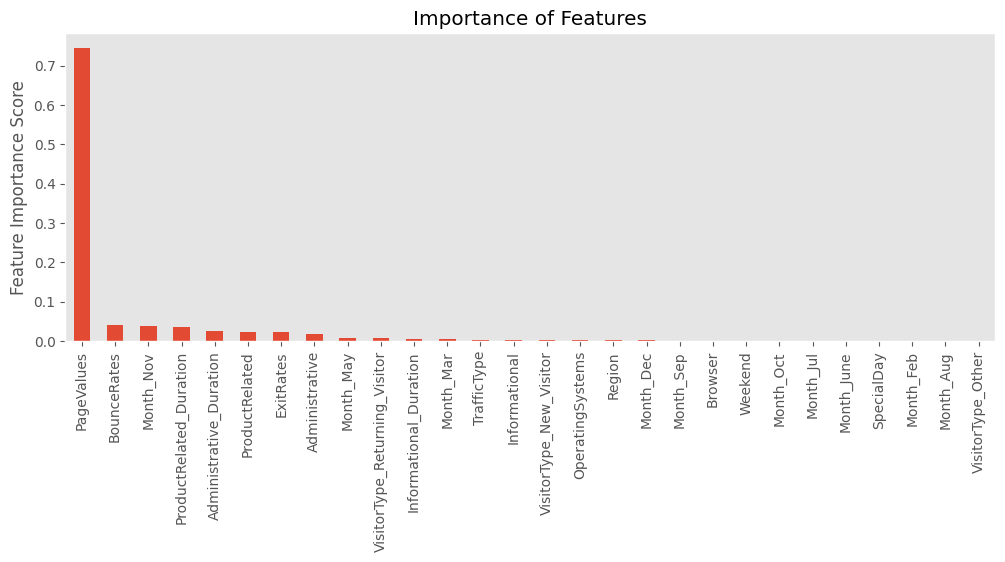

In [ ]:
feat_imp = pd.Series(gbm2.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

# **Measuring True Performance**

In [ ]:
gb = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #final parameters
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

print('Gradient Boost: Final  ClassificationPerformance test :')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, gb_pred))
print('F1 Score        : ', metrics.f1_score(y_test, gb_pred))
print('Precision       : ', metrics.precision_score(y_test, gb_pred))
print('Recall          : ', metrics.recall_score(y_test, gb_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred, target_names=['Rev=0', 'Rev=1']))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boost: Final  ClassificationPerformance test :
-------------------------------------------------------
Accuracy        :  0.9086486486486487
F1 Score        :  0.6572008113590264
Precision       :  0.7012987012987013
Recall          :  0.6183206106870229
Confusion Matrix:
  [[1519   69]
 [ 100  162]]
              precision    recall  f1-score   support

       Rev=0       0.94      0.96      0.95      1588
       Rev=1       0.70      0.62      0.66       262

    accuracy                           0.91      1850
   macro avg       0.82      0.79      0.80      1850
weighted avg       0.90      0.91      0.91      1850



# **Conclusion**


In this project, we used Online Shoppers Intention dataset to build models that can classify website visitor, and predict which of them is likely going to make a purchase on the website. 7 different learning classifiers (Naive Bayes, KNN, Logistic Regression and Gradiant Boosting) were tested and optimized, and we have achieved the best classification performance using Gradient Boost classifier, followed by random Forest, and then Adaboost.

The best classification performance:

Accuracy: 91%

F1 Score: 0.66

Note: There is a clear difference of classification performance between the 2 classes, that is meanly due to the unbalanced nature of our dataset, where around 85% of our data points belong to 1 class, and less than 15% belong to the other.

For future work, different techniques can be considered for mitigating the effects of unbalanced classes.